In [19]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import json
import csv

In [20]:
# import dataset as pandas.DataFrame
data = pd.read_csv('a.tsv', sep='\t', header=0, names=['Person', 'Date', 'Input', 'Result'])
# read i-th row
# user_id = data.iloc[i,0]
# date = data.iloc[i,1]
# food_entries = json.loads(data.iloc[i, 2])
# agregate_intake_goal = json.loads(data.iloc[i,3])

In [21]:
data

,Person,Date,Input,Result
0,1,2014-09-15,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2430}..."
1,1,2014-09-16,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 1862}..."
2,1,2014-09-17,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2251}..."
3,1,2014-09-18,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2001}..."
4,1,2014-09-19,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2158}..."
...,...,...,...,...
587181,9897,2015-03-02,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 1979}..."
587182,9897,2015-03-03,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 2141}..."
587183,9897,2015-03-04,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 543},..."
587184,9897,2015-03-14,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 2024}..."


In [22]:
def get_value(data, row, col, jsn):
    if jsn:
        return json.loads(data.iloc[row, col])
    else:
        return data.iloc[row, col]

In [23]:
data.nunique(axis=0, dropna=False)

Person      9896
Date         208
Input     578774
Result    581728
dtype: int64

In [24]:
x = []
y = [0,0,0,0]
for i in range(1, 9898):
    mask = data.Person == i
    sz = data.loc[mask, :].shape[0]
    if sz < 50 and sz != 0:
        y[0]+=1
    elif sz < 100:
        y[1]+=1
    elif sz < 150:
        y[2]+=1
    elif sz < 200:
        y[3]+=1

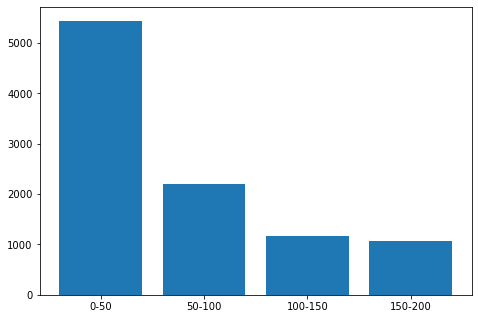

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0-50', '50-100', '100-150', '150-200']
students = y
ax.bar(langs,students)
plt.show()

In [26]:
df = data.copy()
unique_dates = df.iloc[:, 1].unique()
bla = {}
sm = 0
for date in unique_dates:
    mask = df.Date == date
    sz = df.loc[mask, :].shape[0]
    bla[date] = sz
    sm += sz
print(sm)

587186


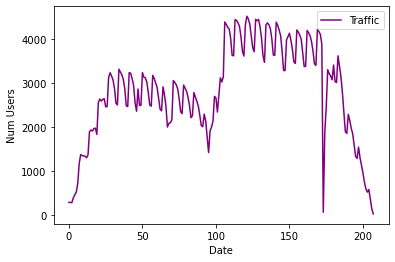

In [27]:
plt.plot([i for i in range(0,208)], list(bla.values()), color='purple', label='Traffic')
plt.ylabel('Num Users')
plt.xlabel('Date')
plt.legend()
plt.show()

In [30]:
unique_dates.sort()
dates = []
for date in unique_dates:
    dates.append(int(date[len(date) - 2:]))
missing = 0
for i in range(1, len(dates)):
    if dates[i - 1] > dates[i]:
        if dates[i] != 1:
            missing += 1
missing

0